In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
 
import tensorflow as tf

In [2]:
def load_process_X(data_file, sheet_name, test_size, random_state=True):

    """
    Load excel data file, Standardize data with mean of 0.0 and standard deviation of 1.0
    and split data into traininig and test sets

    Args:
    data_file: path to excel data file
    sheet_name: excel sheet to load and process e.g (Cement, Steel or Reinforcement)
    test_size (float): percentage of test size
    random_state: Controls the shuffling applied to the data before applying the split.
        Pass an int for reproducible output across multiple function calls
    """

    global Xscaler
    global Yscaler
    
    data = pd.read_excel(data_file, sheet_name=sheet_name)

    data_X = data.iloc[:, 2:-1]
    data_Y = data.iloc[:, -1]

    Xscaler = preprocessing.StandardScaler().fit(data_X.to_numpy())
    X_data = Xscaler.transform(data_X.to_numpy())

    Yscaler = preprocessing.StandardScaler().fit(data_Y.to_numpy().reshape(-1, 1))
    Y_data = Yscaler.transform(data_Y.to_numpy().reshape(-1, 1))

    if random_state:
        X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=test_size, random_state=1000)
    else:
        X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=test_size)

    return X_train, X_test, Y_train, Y_test

In [10]:
X_train, X_test, Y_train, Y_test = load_process_X(data_file='Data for modelling.xlsx', sheet_name='Reinforcement', test_size=.15)

In [11]:
X_train.shape

(102, 12)

In [12]:
# the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu),       # 1st layer with 64 neurons
    tf.keras.layers.Dropout(.25),                           # dropout layer for regularization
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    # tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(1),                               # last layer with 1 nueron for regression
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.mean_squared_error)

model.fit(X_train, Y_train, epochs=200, batch_size=24, validation_data=(X_test, Y_test))

Epoch 1/200
1/5 [=====>........................] - ETA: 1s - loss: 1.3613

2022-11-24 12:30:06.926520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 227ms/step - loss: 0.9136 - val_loss: 1.2426
Epoch 2/200
5/5 [==============================] - 0s 12ms/step - loss: 0.7238 - val_loss: 0.9452
Epoch 3/200
5/5 [==============================] - 0s 11ms/step - loss: 0.5535 - val_loss: 0.7165
Epoch 4/200
1/5 [=====>........................] - ETA: 0s - loss: 0.2352

2022-11-24 12:30:07.922439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 11ms/step - loss: 0.4562 - val_loss: 0.5442
Epoch 5/200
5/5 [==============================] - 0s 11ms/step - loss: 0.3192 - val_loss: 0.4381
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 0.2559 - val_loss: 0.3642
Epoch 7/200
5/5 [==============================] - 0s 11ms/step - loss: 0.2015 - val_loss: 0.3160
Epoch 8/200
5/5 [==============================] - 0s 11ms/step - loss: 0.1796 - val_loss: 0.2803
Epoch 9/200
5/5 [==============================] - 0s 11ms/step - loss: 0.1996 - val_loss: 0.2522
Epoch 10/200
5/5 [==============================] - 0s 11ms/step - loss: 0.1542 - val_loss: 0.2311
Epoch 11/200
5/5 [==============================] - 0s 11ms/step - loss: 0.1863 - val_loss: 0.2152
Epoch 12/200
5/5 [==============================] - 0s 11ms/step - loss: 0.1499 - val_loss: 0.2002
Epoch 13/200
5/5 [==============================] - 0s 11ms/step - loss: 0.1377 - val_loss: 0.1865
Epoch 14/200
5/5 [==========

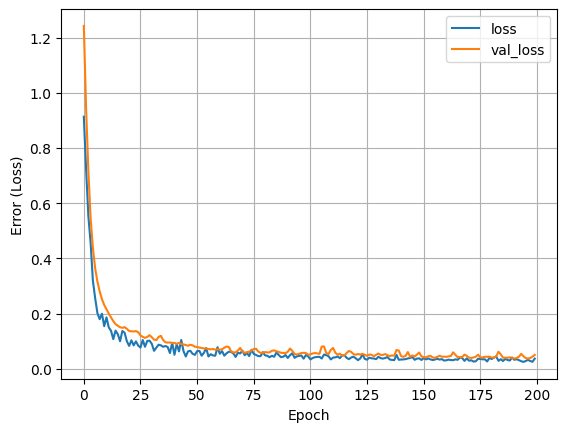

In [13]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    # plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)

plot_loss(model.history)

In [14]:
model.save('Reinforcement_nn.h5')       # save trained model with appropriate name

In [15]:
cement_model = tf.keras.models.load_model('Reinforcement_nn.h5') # load trained model for prediction
yhat = cement_model.predict(X_test)

1/1 [==============================] - 0s 40ms/step


2022-11-24 12:30:30.921156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [16]:
# view the first 5 actual values and their predictions

print(Yscaler.inverse_transform(Y_test[:5]))                    # actual values
print(Yscaler.inverse_transform(yhat.reshape(-1, 1))[:5])       # predicted values

[[147500.]
 [234000.]
 [ 98000.]
 [155000.]
 [180000.]]
[[158136.66]
 [214671.12]
 [108880.97]
 [177340.27]
 [176266.5 ]]
